In [ ]:
from google.colab import drive
import pandas as pd
import csv
import math 
import numpy as np
import seaborn as sns
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from scipy import stats
!pip install scikit-learn-extra
import statistics
drive.mount('/content/gdrive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 8.4 MB/s 
Mounted at /content/gdrive


In [ ]:
sentis = pd.read_csv('/content/gdrive/MyDrive/DS_Capstone/ALL_COMBINED_FINAL.csv')


In [ ]:
print(sentis.columns)
max_fav_score = sentis['fav_to_follower_ratio'].max()
print(max_fav_score)
min_fav_score = sentis['fav_to_follower_ratio'].min()
print(min_fav_score)

Index(['tweet_text', 'tweet_id', 'retweets', 'favorites', 'date',
       'fav_to_follower_ratio', 'retweet_to_follower_ratio',
       'prediction_creative', 'prediction_adventurous', 'prediction_generous',
       'prediction_decisive', 'prediction_diplomatic',
       'prediction_affectionate', 'prediction_hardworking',
       'prediction_observant', 'prediction_helpful', 'prediction_optimistic',
       'prediction_honest', 'prediction_funny', 'prediction_amusing',
       'prediction_calm', 'prediction_polite', 'prediction_charismatic',
       'prediction_romantic', 'prediction_friendly', 'prediction_clever',
       'prediction_compassionate', 'prediction_aggressive',
       'prediction_cynical', 'prediction_grumpy', 'prediction_nervous',
       'prediction_defensive', 'prediction_arrogant', 'prediction_impulsive',
       'prediction_patronizing', 'prediction_pessimistic', 'prediction_sullen',
       'prediction_stubborn', 'prediction_egotistical', 'prediction_rude',
       'prediction_

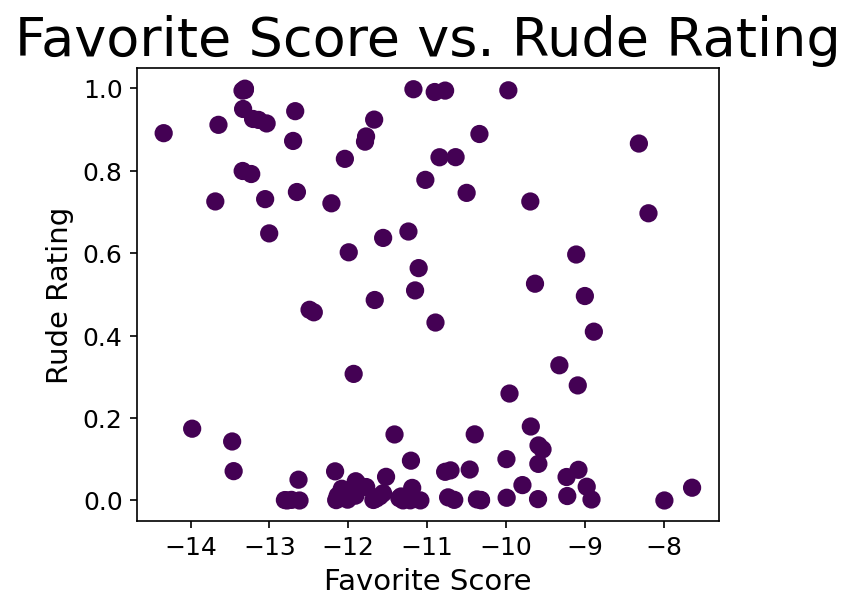

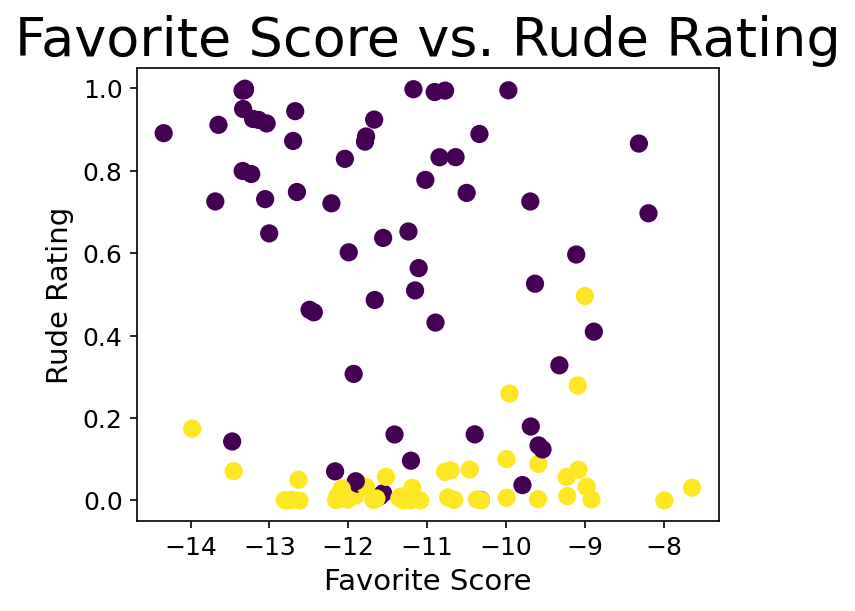

In [ ]:

# Going to on all features except 'tweet_text', 'tweet_id', 'retweets', 'favorites', 
# 'date','fav_to_follower_ratio', 'retweet_to_follower_ratio'
# so drop the extraneous features.
clustering_features = sentis.drop(['tweet_text', 'tweet_id', 'retweets', 'favorites', 
                                   'date','fav_to_follower_ratio', 'retweet_to_follower_ratio'], axis =1)

# Break into training and testing data
X_train, X_test, y_train, y_test = train_test_split(clustering_features, sentis['retweet_to_follower_ratio'],test_size=0.1653543307, random_state=40)


def make_cluster_plots(z, X_train, X_test, y_train, y_test):
  for k in range(1,z):
    kmeans_all_sentis = KMeans(n_clusters=k)
    kmeans_all_sentis.fit(X_train)
    kmeans_predictions = kmeans_all_sentis.predict(X_test)
    kmeans_all_sentis.labels_
    plt.figure(figsize=(5, 4), dpi=150)
    all_unscaled_plot_k3 = plt.scatter(y_test,X_test['prediction_rude'], c=kmeans_predictions,s=60, cmap='viridis')
    plt.title('Favorite Score vs. Rude Rating', fontsize=26)
    plt.xlabel('Favorite Score', fontsize=14)
    plt.ylabel('Rude Rating', fontsize=14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize=12)
    plt.show()

make_cluster_plots(int(3), X_train, X_test, y_train, y_test)
# fav_v_diplomatic = plt.scatter(sentis['fav_to_follower_ratio'],sentis['prediction_arrogant'], s=10, cmap='viridis', alpha=0.25)
# plt.title('Favorite Score vs. Arrogant Ratiing', fontsize=16)
# plt.xlabel('Favorite Score', fontsize=14)
# plt.ylabel('Arrogant Rating', fontsize=14)
# plt.xticks(fontsize = 12)
# plt.yticks(fontsize=12)
# plt.show()

In [12]:
Country = [
    ('US', 'United States'),
    ('AF', 'Afghanistan'),
    ('AL', 'Albania'),
    ('DZ', 'Algeria'),
    ('AS', 'American Samoa'),
    ('AD', 'Andorra'),
    ('AO', 'Angola'),
    ('AI', 'Anguilla'),
    ('AQ', 'Antarctica'),
    ('AG', 'Antigua And Barbuda'),
    ('AR', 'Argentina'),
    ('AM', 'Armenia'),
    ('AW', 'Aruba'),
    ('AU', 'Australia'),
    ('AT', 'Austria'),
    ('AZ', 'Azerbaijan'),
    ('BS', 'Bahamas'),
    ('BH', 'Bahrain'),
    ('BD', 'Bangladesh'),
    ('BB', 'Barbados'),
    ('BY', 'Belarus'),
    ('BE', 'Belgium'),
    ('BZ', 'Belize'),
    ('BJ', 'Benin'),
    ('BM', 'Bermuda'),
    ('BT', 'Bhutan'),
    ('BO', 'Bolivia'),
    ('BA', 'Bosnia And Herzegowina'),
    ('BW', 'Botswana'),
    ('BV', 'Bouvet Island'),
    ('BR', 'Brazil'),
    ('BN', 'Brunei Darussalam'),
    ('BG', 'Bulgaria'),
    ('BF', 'Burkina Faso'),
    ('BI', 'Burundi'),
    ('KH', 'Cambodia'),
    ('CM', 'Cameroon'),
    ('CA', 'Canada'),
    ('CV', 'Cape Verde'),
    ('KY', 'Cayman Islands'),
    ('CF', 'Central African Rep'),
    ('TD', 'Chad'),
    ('CL', 'Chile'),
    ('CN', 'China'),
    ('CX', 'Christmas Island'),
    ('CC', 'Cocos Islands'),
    ('CO', 'Colombia'),
    ('KM', 'Comoros'),
    ('CG', 'Congo'),
    ('CK', 'Cook Islands'),
    ('CR', 'Costa Rica'),
    ('CI', 'Cote D`ivoire'),
    ('HR', 'Croatia'),
    ('CU', 'Cuba'),
    ('CY', 'Cyprus'),
    ('CZ', 'Czech Republic'),
    ('DK', 'Denmark'),
    ('DJ', 'Djibouti'),
    ('DM', 'Dominica'),
    ('DO', 'Dominican Republic'),
    ('TP', 'East Timor'),
    ('EC', 'Ecuador'),
    ('EG', 'Egypt'),
    ('SV', 'El Salvador'),
    ('GQ', 'Equatorial Guinea'),
    ('ER', 'Eritrea'),
    ('EE', 'Estonia'),
    ('ET', 'Ethiopia'),
    ('FK', 'Falkland Islands (Malvinas)'),
    ('FO', 'Faroe Islands'),
    ('FJ', 'Fiji'),
    ('FI', 'Finland'),
    ('FR', 'France'),
    ('GF', 'French Guiana'),
    ('PF', 'French Polynesia'),
    ('TF', 'French S. Territories'),
    ('GA', 'Gabon'),
    ('GM', 'Gambia'),
    ('GE', 'Georgia'),
    ('DE', 'Germany'),
    ('GH', 'Ghana'),
    ('GI', 'Gibraltar'),
    ('GR', 'Greece'),
    ('GL', 'Greenland'),
    ('GD', 'Grenada'),
    ('GP', 'Guadeloupe'),
    ('GU', 'Guam'),
    ('GT', 'Guatemala'),
    ('GN', 'Guinea'),
    ('GW', 'Guinea-bissau'),
    ('GY', 'Guyana'),
    ('HT', 'Haiti'),
    ('HN', 'Honduras'),
    ('HK', 'Hong Kong'),
    ('HU', 'Hungary'),
    ('IS', 'Iceland'),
    ('IN', 'India'),
    ('ID', 'Indonesia'),
    ('IR', 'Iran'),
    ('IQ', 'Iraq'),
    ('IE', 'Ireland'),
    ('IL', 'Israel'),
    ('IT', 'Italy'),
    ('JM', 'Jamaica'),
    ('JP', 'Japan'),
    ('JO', 'Jordan'),
    ('KZ', 'Kazakhstan'),
    ('KE', 'Kenya'),
    ('KI', 'Kiribati'),
    ('KP', 'Korea (North)'),
    ('KR', 'Korea (South)'),
    ('KW', 'Kuwait'),
    ('KG', 'Kyrgyzstan'),
    ('LA', 'Laos'),
    ('LV', 'Latvia'),
    ('LB', 'Lebanon'),
    ('LS', 'Lesotho'),
    ('LR', 'Liberia'),
    ('LY', 'Libya'),
    ('LI', 'Liechtenstein'),
    ('LT', 'Lithuania'),
    ('LU', 'Luxembourg'),
    ('MO', 'Macau'),
    ('MK', 'Macedonia'),
    ('MG', 'Madagascar'),
    ('MW', 'Malawi'),
    ('MY', 'Malaysia'),
    ('MV', 'Maldives'),
    ('ML', 'Mali'),
    ('MT', 'Malta'),
    ('MH', 'Marshall Islands'),
    ('MQ', 'Martinique'),
    ('MR', 'Mauritania'),
    ('MU', 'Mauritius'),
    ('YT', 'Mayotte'),
    ('MX', 'Mexico'),
    ('FM', 'Micronesia'),
    ('MD', 'Moldova'),
    ('MC', 'Monaco'),
    ('MN', 'Mongolia'),
    ('MS', 'Montserrat'),
    ('MA', 'Morocco'),
    ('MZ', 'Mozambique'),
    ('MM', 'Myanmar'),
    ('NA', 'Namibia'),
    ('NR', 'Nauru'),
    ('NP', 'Nepal'),
    ('NL', 'Netherlands'),
    ('AN', 'Netherlands Antilles'),
    ('NC', 'New Caledonia'),
    ('NZ', 'New Zealand'),
    ('NI', 'Nicaragua'),
    ('NE', 'Niger'),
    ('NG', 'Nigeria'),
    ('NU', 'Niue'),
    ('NF', 'Norfolk Island'),
    ('MP', 'Northern Mariana Islands'),
    ('NO', 'Norway'),
    ('OM', 'Oman'),
    ('PK', 'Pakistan'),
    ('PW', 'Palau'),
    ('PA', 'Panama'),
    ('PG', 'Papua New Guinea'),
    ('PY', 'Paraguay'),
    ('PE', 'Peru'),
    ('PH', 'Philippines'),
    ('PN', 'Pitcairn'),
    ('PL', 'Poland'),
    ('PT', 'Portugal'),
    ('PR', 'Puerto Rico'),
    ('QA', 'Qatar'),
    ('RE', 'Reunion'),
    ('RO', 'Romania'),
    ('RU', 'Russian Federation'),
    ('RW', 'Rwanda'),
    ('KN', 'Saint Kitts And Nevis'),
    ('LC', 'Saint Lucia'),
    ('VC', 'St Vincent/Grenadines'),
    ('WS', 'Samoa'),
    ('SM', 'San Marino'),
    ('ST', 'Sao Tome'),
    ('SA', 'Saudi Arabia'),
    ('SN', 'Senegal'),
    ('SC', 'Seychelles'),
    ('SL', 'Sierra Leone'),
    ('SG', 'Singapore'),
    ('SK', 'Slovakia'),
    ('SI', 'Slovenia'),
    ('SB', 'Solomon Islands'),
    ('SO', 'Somalia'),
    ('ZA', 'South Africa'),
    ('ES', 'Spain'),
    ('LK', 'Sri Lanka'),
    ('SH', 'St. Helena'),
    ('PM', 'St.Pierre'),
    ('SD', 'Sudan'),
    ('SR', 'Suriname'),
    ('SZ', 'Swaziland'),
    ('SE', 'Sweden'),
    ('CH', 'Switzerland'),
    ('SY', 'Syrian Arab Republic'),
    ('TW', 'Taiwan'),
    ('TJ', 'Tajikistan'),
    ('TZ', 'Tanzania'),
    ('TH', 'Thailand'),
    ('TG', 'Togo'),
    ('TK', 'Tokelau'),
    ('TO', 'Tonga'),
    ('TT', 'Trinidad And Tobago'),
    ('TN', 'Tunisia'),
    ('TR', 'Turkey'),
    ('TM', 'Turkmenistan'),
    ('TV', 'Tuvalu'),
    ('UG', 'Uganda'),
    ('UA', 'Ukraine'),
    ('AE', 'United Arab Emirates'),
    ('UK', 'United Kingdom'),
    ('UY', 'Uruguay'),
    ('UZ', 'Uzbekistan'),
    ('VU', 'Vanuatu'),
    ('VA', 'Vatican City State'),
    ('VE', 'Venezuela'),
    ('VN', 'Viet Nam'),
    ('VG', 'Virgin Islands (British)'),
    ('VI', 'Virgin Islands (U.S.)'),
    ('EH', 'Western Sahara'),
    ('YE', 'Yemen'),
    ('YU', 'Yugoslavia'),
    ('ZR', 'Zaire'),
    ('ZM', 'Zambia'),
    ('ZW', 'Zimbabwe')
]
countries = ""
for i in Country:
  countries= countries+ i[1].replace(" ", '')
print(countries)

UnitedStatesAfghanistanAlbaniaAlgeriaAmericanSamoaAndorraAngolaAnguillaAntarcticaAntiguaAndBarbudaArgentinaArmeniaArubaAustraliaAustriaAzerbaijanBahamasBahrainBangladeshBarbadosBelarusBelgiumBelizeBeninBermudaBhutanBoliviaBosniaAndHerzegowinaBotswanaBouvetIslandBrazilBruneiDarussalamBulgariaBurkinaFasoBurundiCambodiaCameroonCanadaCapeVerdeCaymanIslandsCentralAfricanRepChadChileChinaChristmasIslandCocosIslandsColombiaComorosCongoCookIslandsCostaRicaCoteD`ivoireCroatiaCubaCyprusCzechRepublicDenmarkDjiboutiDominicaDominicanRepublicEastTimorEcuadorEgyptElSalvadorEquatorialGuineaEritreaEstoniaEthiopiaFalklandIslands(Malvinas)FaroeIslandsFijiFinlandFranceFrenchGuianaFrenchPolynesiaFrenchS.TerritoriesGabonGambiaGeorgiaGermanyGhanaGibraltarGreeceGreenlandGrenadaGuadeloupeGuamGuatemalaGuineaGuinea-bissauGuyanaHaitiHondurasHongKongHungaryIcelandIndiaIndonesiaIranIraqIrelandIsraelItalyJamaicaJapanJordanKazakhstanKenyaKiribatiKorea(North)Korea(South)KuwaitKyrgyzstanLaosLatviaLebanonLesothoLiberiaL

In [ ]:
from collections import Counter
c = Counter()
c.update(['paige', 'ron', 'paige'])
print(c)

Counter({'paige': 2, 'ron': 1})


In [ ]:
entry = str(entry)
entry = punc_to_space(entry)
entry=right_most_side(entry)
entry = keyword_to_space(entry)
entry = to_of_to_space(entry)
entry_list = re.split(r"\s+", entry)
entry_list = [ent for ent in entry_list if ent != ""] # get rid of empty strings as entries
names = entry_list

NameError: ignored

In [ ]:
def create_meshes(x, y, step=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    x_mesh, y_mesh = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    return x_mesh, y_mesh

def plot_contours(x_mesh, y_mesh,ax, model, **params):
    Z = model.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()]) # plot svm boundary within the mesh
    Z = Z.reshape(x_mesh.shape)
    out = ax.contourf(x_mesh, y_mesh, Z, **params) #contourf draws filled contours based on the predictions, which are held in Z
    return out

def plot_bounaries(x, y):
  count=0
  for d in all_experiments_record:
    current = d
    
    # Pre-reg, Ground truth plots

    X_train=current["X_train"] 
    X_test=current["X_test"] 
    y_train=current["y_train"] 
    y_test= current["y_test"] 

    classifier_method_str = current["classifier"]
    model_pre_reg = get_model(X_train,y_train, classifier_method_str)
  
    fig, ax = plt.subplots()
    title = ('Ground Truth Pre-Reg for iteration '+str(count)) # title for the plots
    X_test_0, X_test_1 = X_test[:, 0], X_test[:, 1] # get x's to plot
    x_mesh, y_mesh = create_meshes(X_test_0, X_test_1) # Set-up grid for plotting.

    plot_contours(x_mesh, y_mesh, ax, model_pre_reg, cmap=plt.cm.coolwarm, alpha=0.3, linestyles='dashed',linewidths=3.0)
    ax.scatter(X_test_0, X_test_1, c=y_test, cmap=plt.cm.coolwarm, s=20) # IMPORTANT! 
    # X_test_0, X_test_1 are used for ground truth AND pre-reg predictions.
    # In POST-reg plots, X_test_0, X_test_1 are replaced by X_test_processed_0,
    # and X_test_processed_1, which are taken from:
    # X_test_post_processed = pre_process_data(X_test, current['pre_processing_method'])
    # ie X_test_processed_0, X_test_processed_1 = X_test_post_processed[:, 0], X_test_post_processed[:, 1]
    # COLOR IS BASED ON Y_TEST FOR GROUND TRUTH (pre and post reg ground truth- 
    # so post reg ground truth's y's dont change from pre reg). 
    # WHEN PLOTTING FOR PREDICTIONS, c= y = current['post_regularization_preds'] 
    ax.set_ylabel('y')
    ax.set_xlabel('X_test ground truth pre-regularization for iteration '+str(count))
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()


#  Pre-reg Predictions
    fig, ax = plt.subplots()
    title = ('Predictions Pre-Reg for iteration '+str(count)) # title for the plots
    x_mesh, y_mesh = create_meshes(X_test_0, X_test_1) # same x vals as preprocessed ground truth

    plot_contours(x_mesh, y_mesh, ax, model_pre_reg, cmap=plt.cm.coolwarm, alpha=0.3, linestyles='dashed',linewidths=3.0)
    ax.scatter(X_test_0, X_test_1, c=current['pre_regularization_preds'] , cmap=plt.cm.coolwarm, s=20) 
    ax.set_ylabel('y')
    ax.set_xlabel('X_test predictions pre-regularization for iteration '+str(count))
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    ax.legend()
    plt.show()

